# The Sparks Foundation
# Task # 3   Prediction using Decision Tree Algorithm  
# Submitted By - Deepa Ghag



In [1]:
# Importing libraries in Python
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Loading the iris dataset
iris=pd.read_csv('Iris.csv')

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Analysis 

In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.drop_duplicates(inplace=True)

In [9]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

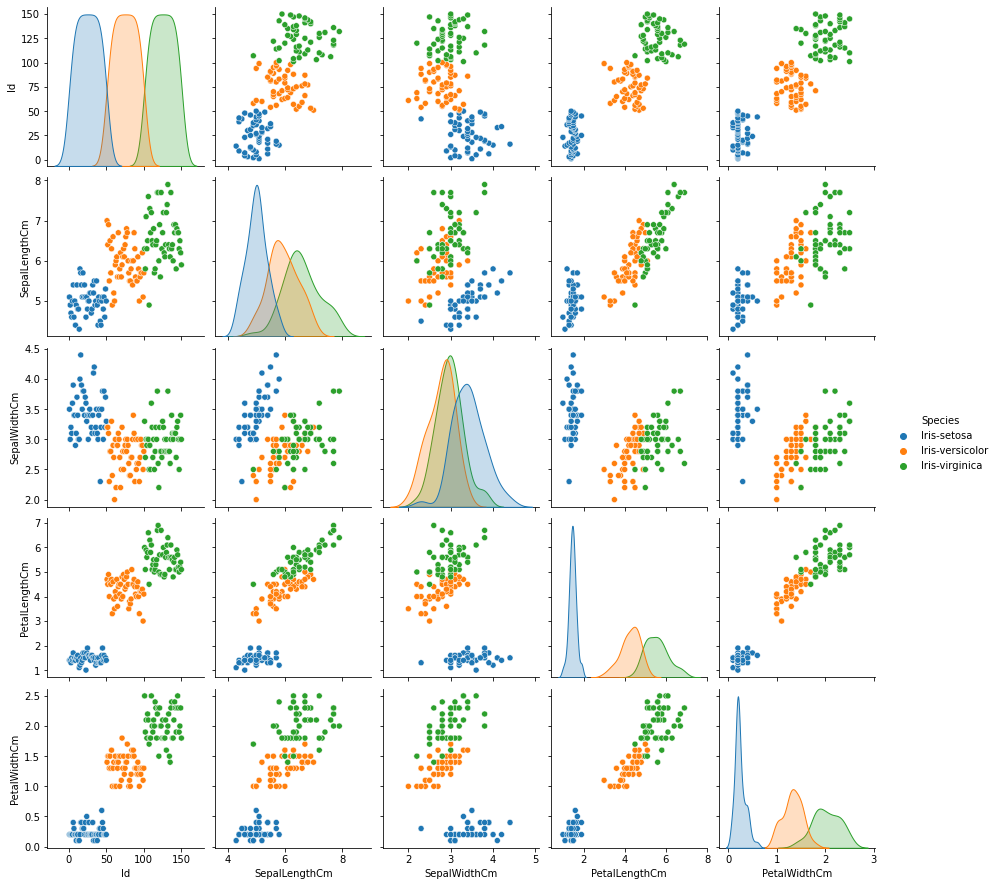

In [10]:
sns.pairplot(iris, hue = 'Species')
plt.show()

# Let's check correalation using heatmap

[]

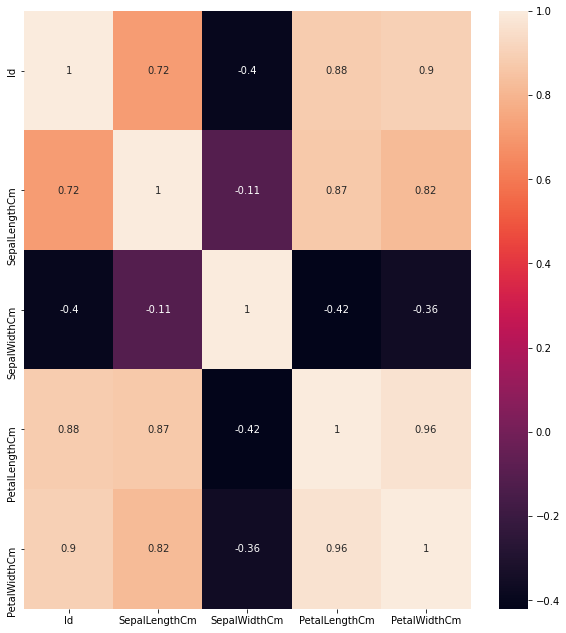

In [11]:
plt.figure(figsize = (10,11))
sns.heatmap(iris.corr(), annot = True)
plt.plot()

#Observation Made 
#Petal length is highly related petal width
#Sepal length is not related sepal width

# Lets check categorical features 'Species' is distributed with all other input

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

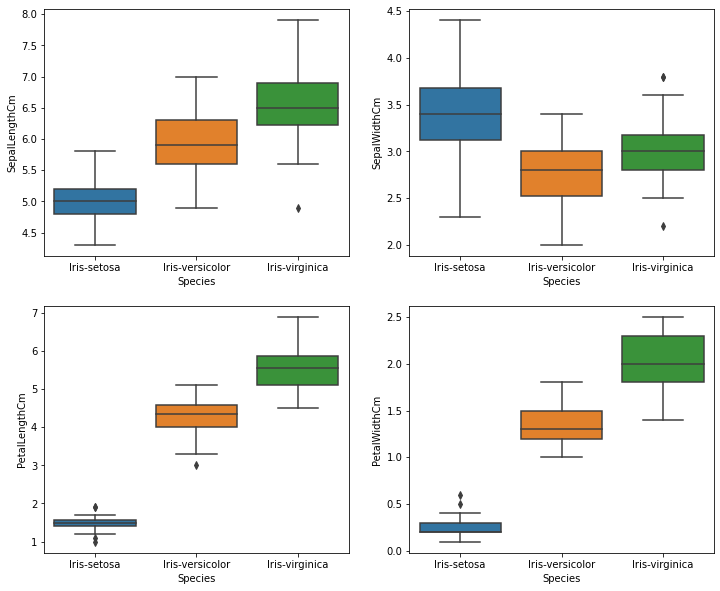

In [12]:
import seaborn as sns

plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.boxplot (x= 'Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2) 
sns.boxplot(x= 'Species',y='SepalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x= 'Species',y='PetalWidthCm',data=iris)

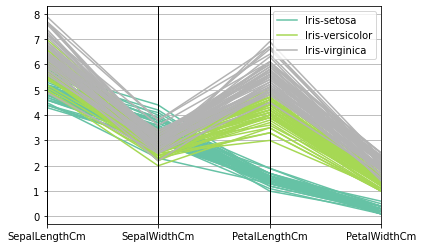

In [13]:
pd.plotting.parallel_coordinates(iris.iloc[:,1:], 'Species', colormap =plt.get_cmap("Set2"))
plt.show()

# Preparing the data for Model Building

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train,test = train_test_split(iris,test_size=0.2)

In [16]:
X_train = train [['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species

In [17]:
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [18]:
from sklearn.preprocessing import LabelEncoder
iris_1 = LabelEncoder()
target = iris_1.fit_transform(iris['Species'])
target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Build Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
DTC = DecisionTreeClassifier(random_state = 12)
Model = DTC.fit(X_train, y_train)

In [21]:
DTC.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [22]:
DTC.score(X_test,y_test)

1.0

In [23]:
import numpy as np
from sklearn import metrics
y_pred = DTC.predict(X_test)


In [24]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))



Accuracy Score: 1.0


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# VISUALISATION THE TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 12)
Model = DTC.fit(X_train, y_train)
print("Decision Tree Classifier created")

Decision Tree Classifier created


In [27]:
f1 = [x for x in iris.columns]
l1 = ['Iris-setosa','Iris-versicolor','Iris-virginica']

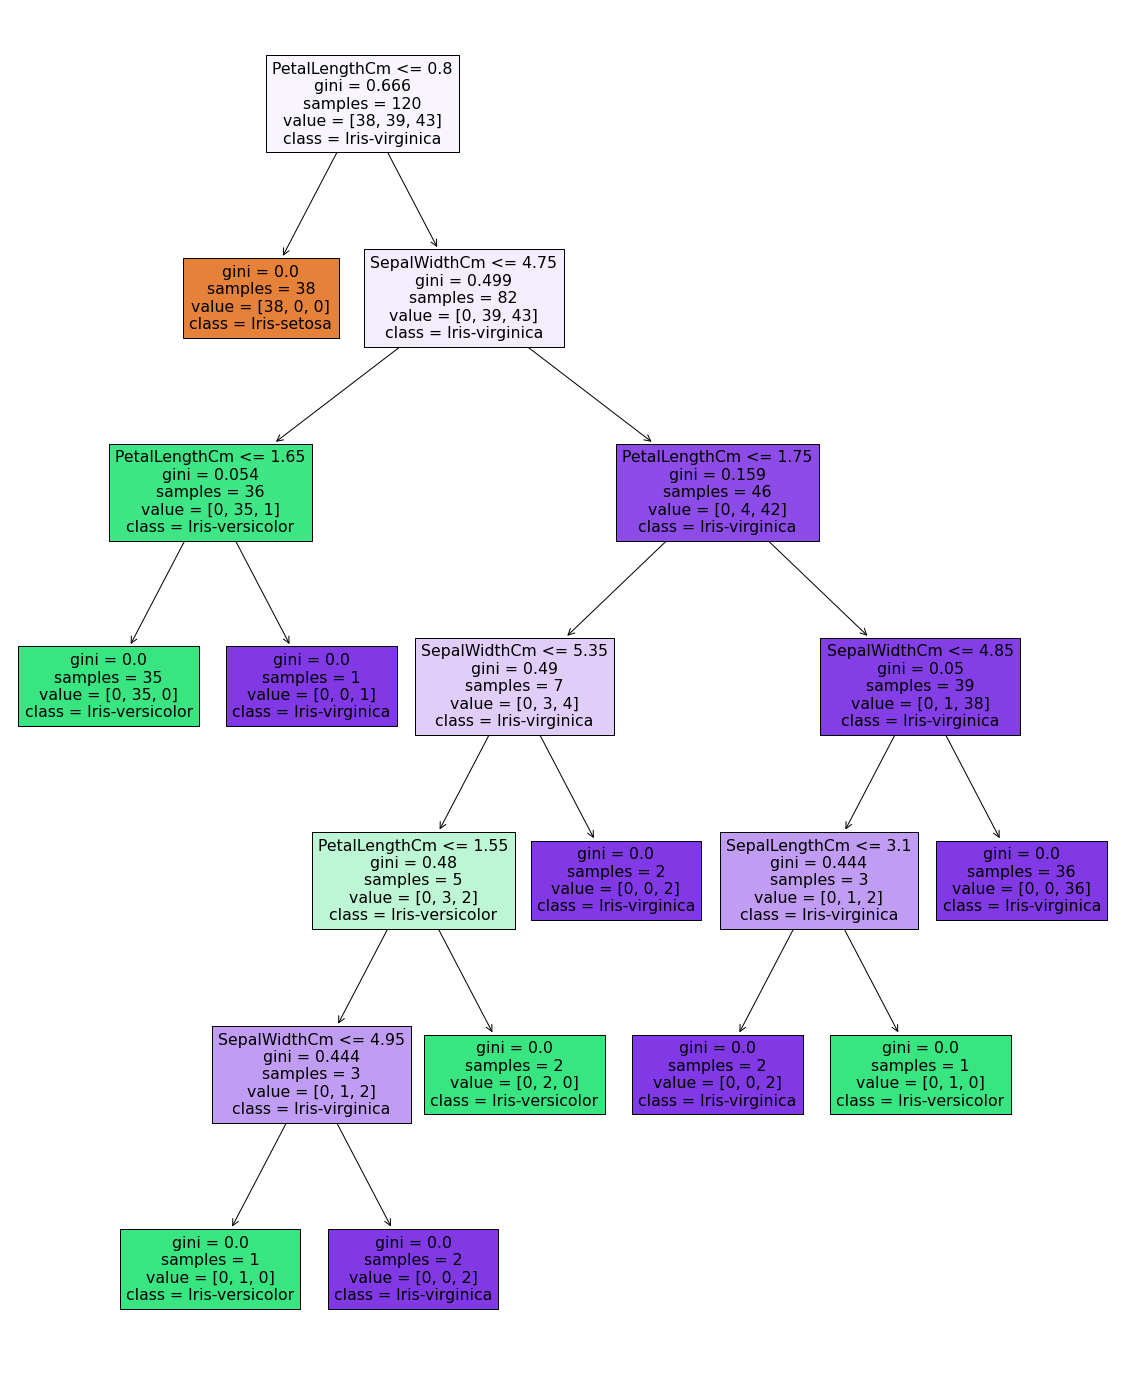

In [28]:
###### import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,25))
graph = tree.plot_tree(DTC,feature_names= f1,
                      class_names = l1,
                      filled = True)

# if we feed any new data to this classifier, it would be able to predict the right class accordingly.